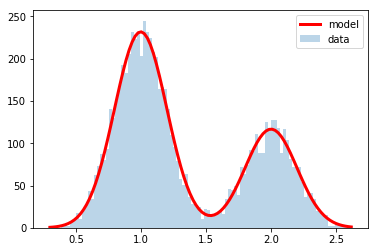

In [19]:
from pylab import *
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import peakutils

data=concatenate((normal(1,.2,5000),normal(2,.2,2500)))
y,x,_=hist(data,100,alpha=.3,label='data')

x=(x[1:]+x[:-1])/2 # for len(x)==len(y)

def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

expected=(1,.2,250,2,.2,125)
params,cov=curve_fit(bimodal,x,y,expected)
sigma=sqrt(diag(cov))
plot(x,bimodal(x,*params),color='red',lw=3,label='model')
legend()

In [40]:
y = bimodal(x,*params)

In [56]:
indexes = peakutils.indexes(y, thres=0.2/max(y), min_dist=0)
print(indexes)
print(x[indexes[0]],x[indexes[1]])

[30 73]
1.0000528573586194 2.0068962281537135


In [57]:
def find_peaks(y):
  x = np.array(y)
  max = np.max(x)
  lenght = len(y)
  ret = []
  for i in range(lenght):
      ispeak = True
      if i-1 > 0:
          ispeak &= (x[i] > 1.1 * x[i-1])
      if i+1 < lenght:
          ispeak &= (x[i] > 1.8 * x[i+1])

      ispeak &= (x[i] > 0.05 * max)
      if ispeak:
          ret.append(i)
  return ret

116.64937826377353

1.0000528573586194